### Decision Tree 

Decision Tree (DT) is a supervised learning method used for classification and regression.


Classification trees are used when dependent variable is categorical


Regression trees are used when dependent variable is continuous


The goal of a decision tree is to split our data into groups such that every element in one group belongs to the same category.

In [0]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [0]:
# importing dataset
iris = load_iris()
print(iris.data.shape)
X = iris.data[50:]  #starting from 50th row of all dataset independent features columns
y = iris.target[50:] #starting from 50th row of target column of dataset

(150, 4)


In [0]:
# SPLITTING DATASET INTO TRAINING SET AND TEST SET
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=20,random_state=1)

In [0]:
# APPYING DECISION TREE CLASSIFICATION MODEL
clf = DecisionTreeClassifier().fit(X_train,y_train)

In [0]:
# PREDICTING TEST SET RESULTS
# prediction with sklearn
y_pred=clf.predict(X_test)
print('training score:',clf.score(X_train,y_train)) #accuracy of training dataset
print('testing score:',clf.score(X_test,y_test))    #accuracy of test set

training score: 1.0
testing score: 0.85


In [0]:
 # CALCULTING ERROR AND ACCURACY OF PREDICTION MODEL USING FEATURE_IMPORTANCES INSTEAD OF CONFUSION MATRIX IN GINI MODEL
'''from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
     [ TP FN
      FP TN]
print("Confusion Matrix:",cm)'''
print("Importance of each feature:" ,clf.feature_importances_)

Importance of each feature: [0.03341688 0.         0.11094151 0.85564162]


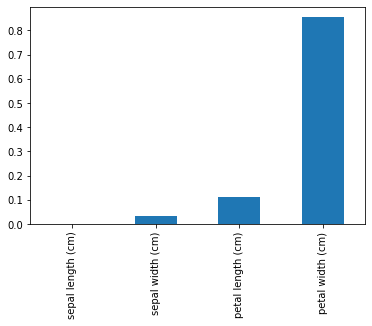

In [0]:
pd.Series( clf.feature_importances_ , index=iris.feature_names ).plot(kind='bar')
           #gini importance           row index label            kind of graph.. could be 'barh' also

### So here we can say our model is overfitted..,

Decision trees may get overfitted when they produce large, complicated decision trees that perfectly fit every training instance but fail to generalize the real relationship or unseen data


Pruning is a technique in machine learning that reduces the size of decision trees by removing sections of the tree that provide little power to classify instances. Pruning reduces the complexity of the final classifier, and hence improves predictive accuracy by the reduction of overfitting.

In [0]:
clf = DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)

print('training score:',clf.score(X_train,y_train))
print('testing score:',clf.score(X_test,y_test))

training score: 1.0
testing score: 0.85


### Visualizing decision trees

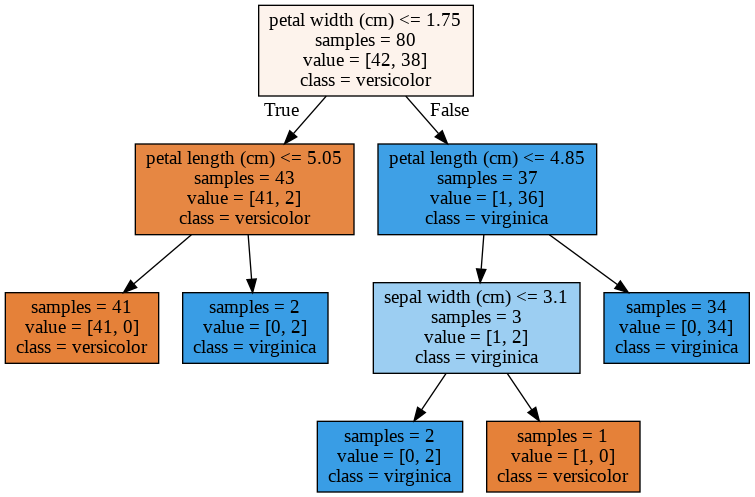

In [0]:
from sklearn.tree import export_graphviz #graphviz works only on 32 bit python version
import graphviz
import pydotplus
from IPython.display import Image 

dot_data=export_graphviz(clf,
               out_file = None,
               feature_names = iris.feature_names,
               impurity=False, # impurity- 1 - (gini index)
               class_names = iris.target_names[1:],
               filled=True #applies color to the decision tree graph
               ) 

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())